# Image reconstruction by autoencoder

In [2]:
import tensorflow as tf
import helpers as helpers
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import numpy as np

Using TensorFlow backend.


## Look at a good input image and then its reconstruction
Load a good input image and plot it. These are ECAL Barrel rechit occupancy images.

Shape of image is:  (170, 360)


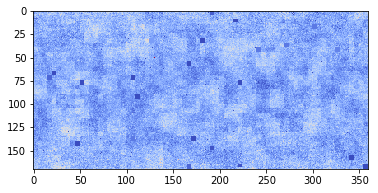

In [5]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276582.hdf5",data_type='good_2016')
input_image=data_sample[10,:]
print("Shape of image is: ",input_image.shape)
im=plt.imshow(input_image,cmap=cm.coolwarm)
plt.show()
plt.clf()
input_image=np.reshape(input_image,(1,1,input_image.shape[0],input_image.shape[1]))


The above is what a good input image looks like. Now load a trained autoencoder model and plot its reconstruction.

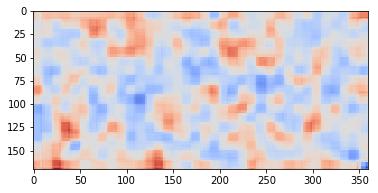

In [3]:
import keras.models as models
trained_model=models.load_model(os.environ['BASEDIR']+"/models/autoencoder_v0_maxnorm_adam.h5")
reconstructed_image=trained_model.predict(input_image)
reconstructed_image=np.reshape(reconstructed_image,(input_image.shape[2],input_image.shape[3]))
im=plt.imshow(reconstructed_image,cmap=cm.coolwarm)
plt.show()

The reconstructed image looks like above. It is expected that is blurred as above. The autoencoder trained is undercomplete and reconstructs the image back from a lower dimensional representation (over latent varaibles.). It is expected to capture the important features of the images. 



Moving on, training and testing loss spectrums look as follows. 

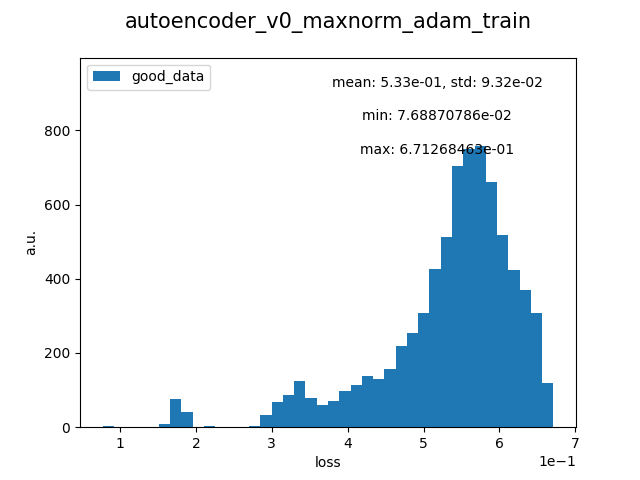

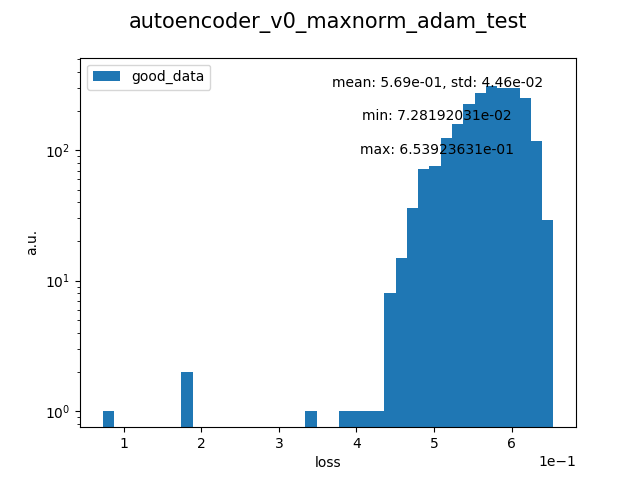

In [4]:
from IPython.display import Image,display
display(Image(filename=os.environ['BASEDIR']+"/plots/loss_as_metric/autoencoder_v0_maxnorm_adam_train.png") )
display(Image(filename=os.environ['BASEDIR']+"/plots/loss_as_metric/autoencoder_v0_maxnorm_adam_test.png") )

Testing and traing loss spectrum are similar. Seems to generalize well as far as reconstructing images are concerned. But thats not exactly what we are trying to do.

## Let us see what happens with bad data.
First, lets look at some artificial (bad) data with hot towers.

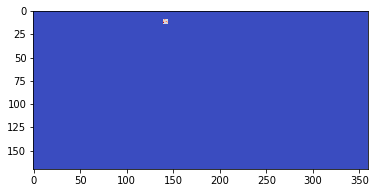

In [5]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276582.hdf5",data_type='bad_2016/hot_towers')
input_image=data_sample[10,:]
im=plt.imshow(input_image,cmap=cm.coolwarm)
plt.show()
plt.clf()
input_image=np.reshape(input_image,(1,1,input_image.shape[0],input_image.shape[1]))


Now let us look at its reconstruction.

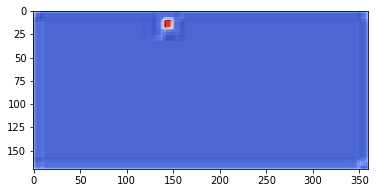

In [6]:
reconstructed_image=trained_model.predict(input_image)
reconstructed_image=np.reshape(reconstructed_image,(input_image.shape[2],input_image.shape[3]))
im=plt.imshow(reconstructed_image,cmap=cm.coolwarm)
plt.show()


Hmmmm.., now lets see how the loss spectrum over several such images (these images were manufactured using randomly picked good images and making a tower hot and then renormalizing) look like compared to loss spectrum of good test images.

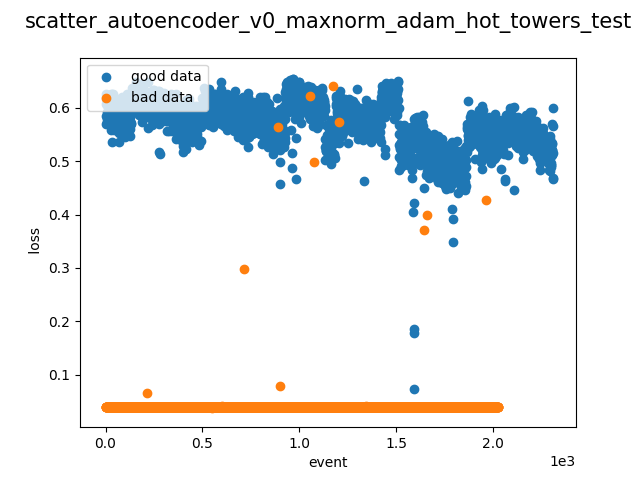

In [7]:
display(Image(filename=os.environ['BASEDIR']+"/plots/loss_as_metric/scatter_autoencoder_v0_maxnorm_adam_hot_towers_test.png") )

The reconstructed loss spectrums are different. Roc(TP_vs_FP)_AUC is >0.99. 

Next look at a different type of (artificial) bad data, images with missing modules. Such an image is shown below.

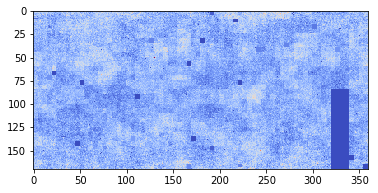

In [8]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276582.hdf5",data_type='bad_2016/missing_modules')
input_image=data_sample[2,:]
im=plt.imshow(input_image,cmap=cm.coolwarm)
plt.show()
plt.clf()
input_image=np.reshape(input_image,(1,1,input_image.shape[0],input_image.shape[1]))


Now look at its reconstruction.

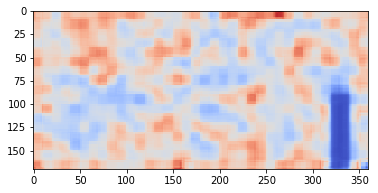

In [9]:
reconstructed_image=trained_model.predict(input_image)
reconstructed_image=np.reshape(reconstructed_image,(input_image.shape[2],input_image.shape[3]))
im=plt.imshow(reconstructed_image,cmap=cm.coolwarm)
plt.show()


Lets look at the loss spectrum compared to loss spectrum of test images, just like before.

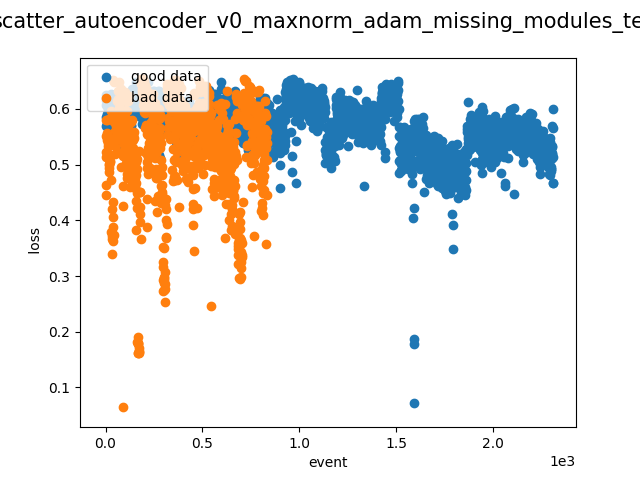

In [10]:
display(Image(filename=os.environ['BASEDIR']+"/plots/loss_as_metric/scatter_autoencoder_v0_maxnorm_adam_missing_modules_test.png") )

This obviously doesn't work well....... Technique needs to be improved a lot more. The reconstruction appears to blur out the edges of the missing module but overall does a similar job as when reconstructing good images. We need better prepocessing techniques and more sopisticated models...?